# Thyroid 

In [1]:
import pandas as pd
import ehrapy as ep
import numpy as np
import warnings
import os
warnings.filterwarnings("ignore")


Installed version 0.2.0 of ehrapy is newer than the latest release 0.1.0! You are running a 
nightly version and features may break!

In [2]:
pd.set_option("display.max_columns", None)


## Getting the dataset

In [3]:
!wget -nc -r --no-parent -l3 http://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/

--2022-02-24 11:30:20--  http://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2206 (2.2K) [text/html]
Saving to: ‘archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/index.html’

archive.ics.uci.edu 100%[===================>]   2.15K  --.-KB/s    in 0s      

2022-02-24 11:30:20 (322 MB/s) - ‘archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/index.html’ saved [2206/2206]

Loading robots.txt; please ignore errors.
--2022-02-24 11:30:20--  http://archive.ics.uci.edu/robots.txt
Reusing existing connection to archive.ics.uci.edu:80.
HTTP request sent, awaiting response... 404 Not Found
2022-02-24 11:30:20 ERROR 404: Not Found.

--2022-02-24 11:30:20--  http://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/HELLO

# Data Wrangling

Define a helper function to find the start index in names file

In [4]:
def find_start_index(txt_lines, start_string):
    for i, elem in enumerate(txt_lines):
        if start_string in elem:
            return i


Define a helper function to get the attribute names in names file

In [5]:
def find_attribute_names(txt_lines, start_index):
    attribute_names = []
    for line in txt_lines[start_index:]:
        line = line.split(':')
        attribute_names.append(line[0])
    return attribute_names


In [6]:
base_directory = os.getcwd()
directory = os.path.join(
    base_directory, "archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease")


## Thyroid-allbp dataset

### Train set

In [7]:
with open(os.path.join(directory, "allbp.names")) as f:
    contents = f.readlines()


In [8]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: " + str(names))


Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [9]:
names.append('class')

In [10]:
data_allbp = pd.read_csv(os.path.join(directory, "allbp.data"),
                         names=names, delimiter=r',')
data_allbp[["class", "id"]] = data_allbp["class"].apply(
    lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset.  
Drop the attribute "TBG" because all the data in this column are missing.

In [11]:
data_allbp.drop(["id"], axis=1, inplace=True)
data_allbp.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [12]:
data_allbp["patient_id"] = range(1, len(data_allbp) + 1)

In [13]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [
    name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)


Replace "?" with NaN.  
Replace the original encoding ('f', 't') to (0, 1).  
Replace the original encoding ('F', 'M') to (0, 1).  
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [14]:
for att in continuous_attributes:
    data_allbp[att].replace('?', np.NaN, inplace=True)
    data_allbp[att] = pd.to_numeric(data_allbp[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_allbp[att].replace('?', np.NaN, inplace=True)
        data_allbp[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_allbp[att].replace(('f', 't'), (0, 1), inplace=True)
        data_allbp[att] = pd.to_numeric(data_allbp[att])

In [15]:
data_allbp.set_index("patient_id", inplace=True)

In [16]:
data_allbp.to_csv("thyroid_allbp_train_prepared.csv")

### Test set

In [17]:
with open(os.path.join(directory, "allbp.names")) as f:
    contents = f.readlines()

In [18]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: " + str(names))

Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [19]:
names.append('class')

In [20]:
data_allbp = pd.read_csv(os.path.join(directory, "allbp.test"),
                         names=names, delimiter=r',')
data_allbp[["class", "id"]] = data_allbp["class"].apply(
    lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset.  
Drop the attribute "TBG" because all the data in this column are missing.

In [21]:
data_allbp.drop(["id"], axis=1, inplace=True)
data_allbp.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [22]:
data_allbp["patient_id"] = range(1, len(data_allbp) + 1)

In [23]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [
    name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)

Replace "?" with NaN.  
Replace the original encoding ('f', 't') to (0, 1).  
Replace the original encoding ('F', 'M') to (0, 1).  
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [24]:
for att in continuous_attributes:
    data_allbp[att].replace('?', np.NaN, inplace=True)
    data_allbp[att] = pd.to_numeric(data_allbp[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_allbp[att].replace('?', np.NaN, inplace=True)
        data_allbp[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_allbp[att].replace(('f', 't'), (0, 1), inplace=True)
        data_allbp[att] = pd.to_numeric(data_allbp[att])

In [25]:
data_allbp.set_index("patient_id", inplace=True)

In [26]:
data_allbp.to_csv("thyroid_allbp_test_prepared.csv")

## Thyroid-allhyper dataset

### Train set

In [27]:
with open(os.path.join(directory, "allhyper.names")) as f:
    contents = f.readlines()

In [28]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: " + str(names))

Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [29]:
names.append('class')

In [30]:
data_allhyper = pd.read_csv(os.path.join(directory, "allhyper.data"),
                            names=names, delimiter=r',')
data_allhyper[["class", "id"]] = data_allhyper["class"].apply(
    lambda x: pd.Series(str(x).split(".|")))


Drop the attribute "id" (patient id number) from the original dataset. \
Drop the attribute "TBG" because all the data in this column are missing.

In [31]:
data_allhyper.drop(["id"], axis=1, inplace=True)
data_allhyper.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [32]:
data_allhyper["patient_id"] = range(1, len(data_allhyper) + 1)

In [33]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [
    name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)


Replace "?" with NaN.\
Replace the original encoding ('f', 't') to (0, 1). \
Replace the original encoding ('F', 'M') to (0, 1). \
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [34]:
for att in continuous_attributes:
    data_allhyper[att].replace('?', np.NaN, inplace=True)
    data_allhyper[att] = pd.to_numeric(data_allhyper[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_allhyper[att].replace('?', np.NaN, inplace=True)
        data_allhyper[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_allhyper[att].replace(('f', 't'), (0, 1), inplace=True)
        data_allhyper[att] = pd.to_numeric(data_allhyper[att])

In [35]:
data_allhyper.set_index("patient_id", inplace=True)

In [36]:
data_allhyper = data_allhyper.assign(dataset_name="allhyper")

In [37]:
data_allhyper.to_csv("thyroid_allhyper_train_prepared.csv")

### Test set

In [38]:
with open(os.path.join(directory, "allhyper.names")) as f:
    contents = f.readlines()

In [39]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: " + str(names))

Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [40]:
names.append('class')

In [41]:
data_allhyper = pd.read_csv(os.path.join(directory, "allhyper.test"),
                            names=names, delimiter=r',')
data_allhyper[["class", "id"]] = data_allhyper["class"].apply(
    lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset. \
Drop the attribute "TBG" because all the data in this column are missing.

In [42]:
data_allhyper.drop(["id"], axis=1, inplace=True)
data_allhyper.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [43]:
data_allhyper["patient_id"] = range(1, len(data_allhyper) + 1)

In [44]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [
    name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)

Replace "?" with NaN.\
Replace the original encoding ('f', 't') to (0, 1). \
Replace the original encoding ('F', 'M') to (0, 1). \
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [45]:
for att in continuous_attributes:
    data_allhyper[att].replace('?', np.NaN, inplace=True)
    data_allhyper[att] = pd.to_numeric(data_allhyper[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_allhyper[att].replace('?', np.NaN, inplace=True)
        data_allhyper[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_allhyper[att].replace(('f', 't'), (0, 1), inplace=True)
        data_allhyper[att] = pd.to_numeric(data_allhyper[att])

In [46]:
data_allhyper.set_index("patient_id", inplace=True)

In [47]:
data_allhyper.to_csv("thyroid_allhyper_test_prepared.csv")

## Thyroid-allhypo dataset

### Train set

In [48]:
with open(os.path.join(directory, "allhypo.names")) as f:
    contents = f.readlines()

In [49]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: {str(names)}")

Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [50]:
names.append('class')

In [51]:
data_allhypo = pd.read_csv(os.path.join(directory, "allhypo.data"),
                           names=names, delimiter=r',')
data_allhypo[["class", "id"]] = data_allhypo["class"].apply(
    lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset. \
Drop the attribute "TBG" because all the data in this column are missing.

In [52]:
data_allhypo.drop(["id"], axis=1, inplace=True)
data_allhypo.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [53]:
data_allhypo["patient_id"] = range(1, len(data_allhypo) + 1)

In [54]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [
    name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)

Replace "?" with NaN.\
Replace the original encoding ('f', 't') to (0, 1). \
Replace the original encoding ('F', 'M') to (0, 1). \
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [55]:
for att in continuous_attributes:
    data_allhypo[att].replace('?', np.NaN, inplace=True)
    data_allhypo[att] = pd.to_numeric(data_allhypo[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_allhypo[att].replace('?', np.NaN, inplace=True)
        data_allhypo[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_allhypo[att].replace(('f', 't'), (0, 1), inplace=True)
        data_allhypo[att] = pd.to_numeric(data_allhypo[att])

In [56]:
data_allhypo.set_index("patient_id", inplace=True)

In [57]:
data_allhypo.to_csv("thyroid_allhypo_train_prepared.csv")

### Test set

In [58]:
with open(os.path.join(directory, "allhypo.names")) as f:
    contents = f.readlines()

In [59]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: {str(names)}")

Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [60]:
names.append('class')

In [61]:
data_allhypo = pd.read_csv(os.path.join(directory, "allhypo.test"),
                           names=names, delimiter=r',')
data_allhypo[["class", "id"]] = data_allhypo["class"].apply(
    lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset. \
Drop the attribute "TBG" because all the data in this column are missing.

In [62]:
data_allhypo.drop(["id"], axis=1, inplace=True)
data_allhypo.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [63]:
data_allhypo["patient_id"] = range(1, len(data_allhypo) + 1)

In [64]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [
    name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)

Replace "?" with NaN.\
Replace the original encoding ('f', 't') to (0, 1). \
Replace the original encoding ('F', 'M') to (0, 1). \
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [65]:
for att in continuous_attributes:
    data_allhypo[att].replace('?', np.NaN, inplace=True)
    data_allhypo[att] = pd.to_numeric(data_allhypo[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_allhypo[att].replace('?', np.NaN, inplace=True)
        data_allhypo[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_allhypo[att].replace(('f', 't'), (0, 1), inplace=True)
        data_allhypo[att] = pd.to_numeric(data_allhypo[att])

In [66]:
data_allhypo.set_index("patient_id", inplace=True)

In [67]:
data_allhypo.to_csv("thyroid_allhypo_test_prepared.csv")

## Thyroid-allrep dataset

### Train set

In [68]:
with open(os.path.join(directory, "allrep.names")) as f:
    contents = f.readlines()

In [69]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: {str(names)}")

Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [70]:
names.append('class')

In [71]:
data_allrep = pd.read_csv(os.path.join(directory, "allrep.data"),
                          names=names, delimiter=r',')
data_allrep[["class", "id"]] = data_allrep["class"].apply(
    lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset. \
Drop the attribute "TBG" because all the data in this column are missing.

In [72]:
data_allrep.drop(["id"], axis=1, inplace=True)
data_allrep.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [73]:
data_allrep["patient_id"] = range(1, len(data_allrep) + 1)

In [74]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [
    name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)

Replace "?" with NaN.\
Replace the original encoding ('f', 't') to (0, 1). \
Replace the original encoding ('F', 'M') to (0, 1). \
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [75]:
for att in continuous_attributes:
    data_allrep[att].replace('?', np.NaN, inplace=True)
    data_allrep[att] = pd.to_numeric(data_allrep[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_allrep[att].replace('?', np.NaN, inplace=True)
        data_allrep[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_allrep[att].replace(('f', 't'), (0, 1), inplace=True)
        data_allrep[att] = pd.to_numeric(data_allrep[att])

In [76]:
data_allrep.set_index("patient_id", inplace=True)

In [77]:
data_allrep.to_csv("thyroid_allrep_train_prepared.csv")

### Test set

In [78]:
with open(os.path.join(directory, "allrep.names")) as f:
    contents = f.readlines()

In [79]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: {str(names)}")


Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [80]:
names.append('class')

In [81]:
data_allrep = pd.read_csv(os.path.join(directory, "allrep.test"),
                          names=names, delimiter=r',')
data_allrep[["class", "id"]] = data_allrep["class"].apply(
    lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset. \
Drop the attribute "TBG" because all the data in this column are missing.

In [82]:
data_allrep.drop(["id"], axis=1, inplace=True)
data_allrep.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [83]:
data_allrep["patient_id"] = range(1, len(data_allrep) + 1)

In [84]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [
    name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)

Replace "?" with NaN.\
Replace the original encoding ('f', 't') to (0, 1). \
Replace the original encoding ('F', 'M') to (0, 1). \
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [85]:
for att in continuous_attributes:
    data_allrep[att].replace('?', np.NaN, inplace=True)
    data_allrep[att] = pd.to_numeric(data_allrep[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_allrep[att].replace('?', np.NaN, inplace=True)
        data_allrep[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_allrep[att].replace(('f', 't'), (0, 1), inplace=True)
        data_allrep[att] = pd.to_numeric(data_allrep[att])

In [86]:
data_allrep.set_index("patient_id", inplace=True)

In [87]:
data_allrep.to_csv("thyroid_allrep_test_prepared.csv")

## Thyroid-dis dataset

### Train set

In [88]:
with open(os.path.join(directory, "dis.names")) as f:
    contents = f.readlines()

In [89]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: " + str(names))

Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [90]:
names.append('class')

In [91]:
data_dis = pd.read_csv(os.path.join(directory, "dis.data"),
                       names=names, delimiter=r',')
data_dis[["class", "id"]] = data_dis["class"].apply(
    lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset. \
Drop the attribute "TBG" because all the data in this column are missing.

In [92]:
data_dis.drop(["id"], axis=1, inplace=True)
data_dis.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [93]:
data_dis["patient_id"] = range(1, len(data_dis) + 1)

In [94]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [
    name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)

Replace "?" with NaN.\
Replace the original encoding ('f', 't') to (0, 1). \
Replace the original encoding ('F', 'M') to (0, 1). \
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [95]:
for att in continuous_attributes:
    data_dis[att].replace('?', np.NaN, inplace=True)
    data_dis[att] = pd.to_numeric(data_dis[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_dis[att].replace('?', np.NaN, inplace=True)
        data_dis[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_dis[att].replace(('f', 't'), (0, 1), inplace=True)
        data_dis[att] = pd.to_numeric(data_dis[att])

In [96]:
data_dis.set_index("patient_id", inplace=True)

In [97]:
data_dis.to_csv("thyroid_dis_train_prepared.csv")

### Test set

In [98]:
with open(os.path.join(directory, "dis.names")) as f:
    contents = f.readlines()

In [99]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: {str(names)}")

Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [100]:
names.append('class')

In [101]:
data_dis = pd.read_csv(os.path.join(directory, "dis.test"),
                       names=names, delimiter=r',')
data_dis[["class", "id"]] = data_dis["class"].apply(
    lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset. \
Drop the attribute "TBG" because all the data in this column are missing.

In [102]:
data_dis.drop(["id"], axis=1, inplace=True)
data_dis.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [103]:
data_dis["patient_id"] = range(1, len(data_dis) + 1)

In [104]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [
    name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)

Replace "?" with NaN.\
Replace the original encoding ('f', 't') to (0, 1). \
Replace the original encoding ('F', 'M') to (0, 1). \
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [105]:
for att in continuous_attributes:
    data_dis[att].replace('?', np.NaN, inplace=True)
    data_dis[att] = pd.to_numeric(data_dis[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_dis[att].replace('?', np.NaN, inplace=True)
        data_dis[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_dis[att].replace(('f', 't'), (0, 1), inplace=True)
        data_dis[att] = pd.to_numeric(data_dis[att])

In [106]:
data_dis.set_index("patient_id", inplace=True)

In [107]:
data_dis.to_csv("thyroid_dis_test_prepared.csv")

## Thyroid-sick dataset

### Train set

In [108]:
with open(os.path.join(directory, "sick.names")) as f:
    contents = f.readlines()

In [109]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: {str(names)}")

Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [110]:
names.append('class')

In [111]:
data_sick = pd.read_csv(os.path.join(directory, "sick.data"),
                        names=names, delimiter=r',')
data_sick[["class", "id"]] = data_sick["class"].apply(
    lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset. \
Drop the attribute "TBG" because all the data in this column are missing.

In [112]:
data_sick.drop(["id"], axis=1, inplace=True)
data_sick.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [113]:
data_sick["patient_id"] = range(1, len(data_sick) + 1)

In [114]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [
    name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)

Replace "?" with NaN.\
Replace the original encoding ('f', 't') to (0, 1). \
Replace the original encoding ('F', 'M') to (0, 1). \
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [115]:
for att in continuous_attributes:
    data_sick[att].replace('?', np.NaN, inplace=True)
    data_sick[att] = pd.to_numeric(data_sick[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_sick[att].replace('?', np.NaN, inplace=True)
        data_sick[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_sick[att].replace(('f', 't'), (0, 1), inplace=True)
        data_sick[att] = pd.to_numeric(data_sick[att])

In [116]:
data_sick.set_index("patient_id", inplace=True)

In [117]:
data_sick.to_csv("thyroid_sick_train_prepared.csv")

### Test set

In [118]:
with open(os.path.join(directory, "sick.names")) as f:
    contents = f.readlines()

In [119]:
start_index = find_start_index(contents, 'age:')
names = find_attribute_names(contents, start_index)
print(f"Attribute names are: {str(names)}")


Attribute names are: ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source']


In [120]:
names.append('class')

In [121]:
data_sick = pd.read_csv(os.path.join(directory, "sick.test"),
                        names=names, delimiter=r',')
data_sick[["class", "id"]] = data_sick["class"].apply(
    lambda x: pd.Series(str(x).split(".|")))

Drop the attribute "id" (patient id number) from the original dataset. \
Drop the attribute "TBG" because all the data in this column are missing.

In [122]:
data_sick.drop(["id"], axis=1, inplace=True)
data_sick.drop(["TBG"], axis=1, inplace=True)
names.remove("TBG")

Add a patient ID.

In [123]:
data_sick["patient_id"] = range(1, len(data_sick) + 1)

In [124]:
continuous_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_attributes = [
    name for name in names if not name in continuous_attributes]
assert len(categorical_attributes) + len(continuous_attributes) == len(names)

Replace "?" with NaN.\
Replace the original encoding ('f', 't') to (0, 1). \
Replace the original encoding ('F', 'M') to (0, 1). \
Replace "?"(missing value) with NaN and convert from object type to numeric type.

In [125]:
for att in continuous_attributes:
    data_sick[att].replace('?', np.NaN, inplace=True)
    data_sick[att] = pd.to_numeric(data_sick[att])

for att in categorical_attributes:
    if att == 'referral source':
        break
    else:
        data_sick[att].replace('?', np.NaN, inplace=True)
        data_sick[att].replace(('F', 'M'), (0, 1), inplace=True)
        data_sick[att].replace(('f', 't'), (0, 1), inplace=True)
        data_sick[att] = pd.to_numeric(data_sick[att])

In [126]:
data_sick.set_index("patient_id", inplace=True)

In [127]:
data_sick.to_csv("thyroid_sick_test_prepared.csv")

## Combine all datasets together

In [128]:
file_list = []
length = 0
for _, _, files in os.walk(base_directory):
    for file in files:
        if file.endswith("_prepared.csv"):
            file_list.append(file)
            length += len(pd.read_csv(file))

thyroid = pd.concat((pd.read_csv(f).assign(
    dataset_name=f.split('_')[1]) for f in file_list))
thyroid.drop(["patient_id"], axis=1, inplace=True)
thyroid["patient_id"] = range(1, len(thyroid) + 1)
thyroid.set_index("patient_id", inplace=True)
thyroid.to_csv("thyroid.csv")


In [129]:
df_thyroid = pd.read_csv(os.path.join(base_directory, "thyroid.csv"))
assert length == len(df_thyroid)

In [130]:
names = df_thyroid.columns.values.tolist()
names

['patient_id',
 'age',
 'sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH measured',
 'TSH',
 'T3 measured',
 'T3',
 'TT4 measured',
 'TT4',
 'T4U measured',
 'T4U',
 'FTI measured',
 'FTI',
 'TBG measured',
 'referral source',
 'class',
 'dataset_name']

# ehrapy sanity check

In [131]:
column_obs_only = [
    'age',
    'sex',
    'dataset_name',
    'referral source']

In [132]:
adata = ep.io.read(os.path.join(base_directory, "thyroid.csv"),
                   extension="csv",
                   index_column="patient_id",
                   columns_obs_only=column_obs_only)

In [133]:
adata_allhyper = adata[adata.obs['dataset_name'] == 'allhyper'].copy()

In [134]:
adata_allhyper = ep.pp.encode(
    adata_allhyper, encodings={"one_hot_encoding": ["class"]}
)

Output()

Quality control metrics missing. Calculating...

Output()

... storing 'dataset_name' as categorical
... storing 'referral source' as categorical
... storing 'class' as categorical


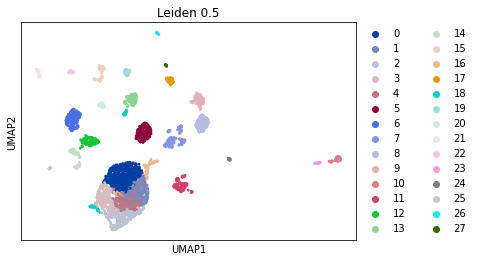

In [135]:
ep.pp.knn_impute(adata_allhyper)
ep.pp.norm_scale(adata_allhyper)
ep.pp.pca(adata_allhyper)
ep.pp.neighbors(adata_allhyper)
ep.tl.umap(adata_allhyper)
ep.tl.leiden(adata_allhyper, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata_allhyper, color=["leiden_0_5"], title="Leiden 0.5")

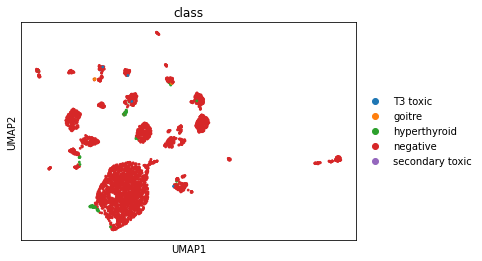

In [136]:
ep.pl.umap(adata_allhyper, color=["class"], ncols=1, wspace=0.75)